In [1]:
import pandas as pd
import numpy as np

mglep_survey = pd.read_excel('data/MGLEP 초청자선발현황.xlsx', 
                    sheet_name='survey', header=0)
mglep_survey.shape

(34, 26)

In [2]:
mglep_survey = mglep_survey.drop(['NO','Unnamed: 22','Unnamed: 23', 
                                  'Unnamed: 24','Unnamed: 25'],1)
mglep_survey.head(3)

,선발여부(1차),Name,University,Group,Country,Name of Organization(Before MGLEP),Department(Before MGLEP),Position(Before MGLEP),Name of Organization(After MGLEP completion),Department(After MGLEP completion),...,"Explanation of your change(e.g. promotion, Department transfer, etc. )",Q3. Have you been promoted?,Q1. Number of your experience share activities,Q2. Experience share type,"Q2-1. If you answered ""others"" above, please specify.","Q3. Specify your experience share(please include date, event title if any.)",Q1. Do you have any experience utilizing your thesis work/research?,"Q2. Please Specify your experiences.(please include date, event title if any.)",Tell us your experience.,Please leave any comments :D
0,선발,FIRMAN MAULANA,University of Seoul,2016(MGLEP2),Indonesia,Ministry of Environment and Forestry (MoEF),Strategic Policy Center,"Head sub Division of Politic, Legal, and Secur...",MoEF/Special Task Force for Upstream Oil and G...,Strategic Policy Center/Supervisory Committee,...,"Aside from my previous job, i also have been a...",YES,more than 9,Experience share / Knowledge share,NaN,Assigned for several special task for environm...,No,NaN,NaN,This program should include leadership managem...
1,NaN,Carolina Moreira,Yeongnam University,2015(MGLEP1),Costa Rica,Ministry of Health,Environmental health,environmental agent,Ministry of Health,Environmental Health,...,"Unfortunately, my organization hasn't taken an...",NO,None,any,NaN,I haven't had the oppportunity to apply what I...,No,NaN,NaN,The program itself is good and the exprience a...
2,NaN,Tran Hung Nguyen,University of Seoul,2016(MGLEP2),Vietnam,Ministry of Natural Resources and Environment,Vietnam Institute of Geoscience and Mineral Re...,Researcher,Ministry of Natural Resources and Environment,Vietnam Center on Karst and Geoheritage,...,I change to new department for new research an...,YES,5~6,Project,NaN,project that related to thesis title. I join t...,Yes,the project that is the expansion of thesis title,"friendship, experience share amongst the MGLEP...",MGLEP is the great chance for me to experience...


In [3]:
print("{}명 중 {}명 중이 응답하였고, {}명이 응답하지 않았습니다.".format(
    mglep_survey['Tell us your experience.'].shape[0],
    mglep_survey['Tell us your experience.'].notnull().sum(),
    mglep_survey['Tell us your experience.'].isnull().sum())
)

34명 중 16명 중이 응답하였고, 18명이 응답하지 않았습니다.


In [4]:
share_exp = pd.DataFrame(mglep_survey[(mglep_survey['Tell us your experience.'].notnull()) & 
                        (mglep_survey['Tell us your experience.'] != '-')
                        ][['Name','Country','Tell us your experience.']].reset_index(drop=True))

In [5]:
share_exp['Tell us your experience.'][0]

'friendship, experience share amongst the MGLEP alumni, learn other culture'

In [6]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(share_exp['Tell us your experience.'][0], "html5lib")

In [7]:
print(share_exp['Tell us your experience.'][0][:700])
example1.get_text()[:700]

friendship, experience share amongst the MGLEP alumni, learn other culture


'friendship, experience share amongst the MGLEP alumni, learn other culture'

In [8]:
import re

letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

'friendship  experience share amongst the MGLEP alumni  learn other culture'

In [9]:
lower_case = letters_only.lower()
words = lower_case.split()
print(len(words))
words[:10]

10


['friendship',
 'experience',
 'share',
 'amongst',
 'the',
 'mglep',
 'alumni',
 'learn',
 'other',
 'culture']

In [10]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

8


['friendship',
 'experience',
 'share',
 'amongst',
 'mglep',
 'alumni',
 'learn',
 'culture']

In [12]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [13]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [14]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
words[:10]

['friendship',
 'experi',
 'share',
 'amongst',
 'mglep',
 'alumni',
 'learn',
 'cultur']

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words =  [wordnet_lemmatizer.lemmatize(w) for w in words]

words[:10]

fly
fly


['friendship',
 'experi',
 'share',
 'amongst',
 'mglep',
 'alumnus',
 'learn',
 'cultur']

# 문자열 처리
*  위에서 간략하게 살펴본 내용을 바탕으로 문자열을 처리해 본다.

In [16]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words =  [stemmer.stem(w) for w in meaningful_words]
    return ' '.join(stemming_words)    

In [17]:
clean_share_exp = review_to_words(share_exp['Tell us your experience.'][0])
clean_share_exp

'friendship experi share amongst mglep alumni learn cultur'

In [18]:
num_share_exp = share_exp['Tell us your experience.'].size
num_share_exp

15

In [19]:
clean_mglep_survey_share_exp = []

for i in range(0, num_share_exp):
    clean_mglep_survey_share_exp.append(review_to_words(share_exp['Tell us your experience.'][i]))

# 2개 단위로 상태를 찍도록 하여 어느 정도 실행이 되는 지 확인

# clean_mglep_survey_share_exp = []
# for i in range(0, num_share_exp):
#     if (i+1)%2 == 0:
#         print('Sharing Experience {} of {} '.format(i+1, num_share_exp))
#     clean_mglep_survey_share_exp.append(review_to_words(share_exp['Tell us your experience.'][i]))

%time share_exp['Tell us your experience_clean'] = share_exp['Tell us your experience.'].apply(review_to_words)

Wall time: 38.9 ms


In [20]:
clean_mglep_survey_share_exp = pd.Series(clean_mglep_survey_share_exp)

### 워드 클라우드
- 단어의 빈도 수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법
- 단순히 빈도 수를 표현하기 보다는 상관관계나 유사도 등으로 배치하는 게 더 의미 있기 때문에 큰 정보를 얻기는 어렵다.

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color= backgroundcolor,
                          width = width, height = height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

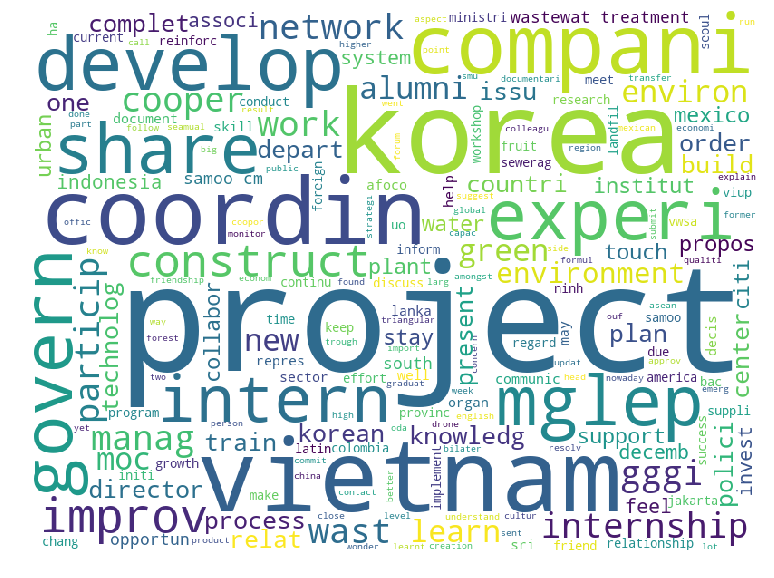

In [22]:
displayWordCloud(' '.join(clean_mglep_survey_share_exp))

In [23]:
share_exp['num_words'] = clean_mglep_survey_share_exp.apply(
                         lambda x: len(str(x).split()))

share_exp['num_uniq_words'] = clean_mglep_survey_share_exp.apply(
                            lambda x: len(set(str(x).split())))

In [24]:
x = clean_mglep_survey_share_exp[0]
x = str(x).split()
print(len(x))
x[:10]

8


['friendship',
 'experi',
 'share',
 'amongst',
 'mglep',
 'alumni',
 'learn',
 'cultur']

응답자별 단어 평균 값 : 43.53333333333333
응답자별 단어 중간 값 : 17.0
응답자별 고유 단어 평균 값 : 33.333333333333336
응답자별 고유 단어 중간 값 : 16.0


Text(0.5, 1.0, '리뷰별 고유 단어 수 분포')

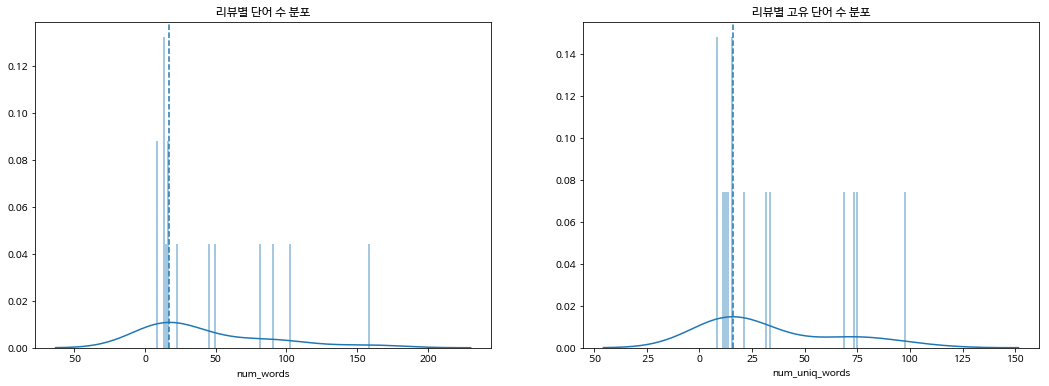

In [25]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('응답자별 단어 평균 값 :', share_exp['num_words'].mean())
print('응답자별 단어 중간 값 :', share_exp['num_words'].median())
sns.distplot(share_exp['num_words'], bins=100, ax=axes[0])
axes[0].axvline(share_exp['num_words'].median(), linestyle ='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('응답자별 고유 단어 평균 값 :', share_exp['num_uniq_words'].mean())
print('응답자별 고유 단어 중간 값 :', share_exp['num_uniq_words'].median())
sns.distplot(share_exp['num_uniq_words'], bins=100, ax=axes[1])
axes[1].axvline(share_exp['num_uniq_words'].median(), linestyle = 'dashed')
axes[1].set_title('리뷰별 고유 단어 수 분포')

CountVectorizer 인수 참조

1. https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

2. https://kugancity.tistory.com/entry/sklearn-CountVectorizer-%ED%81%B4%EB%9E%98%EC%8A%A4-%EC%82%AC%EC%9A%A9%EB%B2%95

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer =None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range = (1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
pipeline = Pipeline([('vect', vectorizer),])

In [28]:
%time train_data_features = pipeline.fit_transform(clean_mglep_survey_share_exp)
train_data_features

Wall time: 9.97 ms


<15x97 sparse matrix of type '<class 'numpy.int64'>'
	with 254 stored elements in Compressed Sparse Row format>

In [29]:
train_data_features.shape

(15, 97)

In [30]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

97


['also',
 'alumni',
 'build',
 'center',
 'chang',
 'citi',
 'collabor',
 'complet',
 'conduct',
 'cooper']

In [31]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

[[ 3  4  3  3  2  3  3  3  2  5  3  3  2  3  7  2  3  2  2  4  4  6  3  2
   2  2  6  4  2  2  6  2  2  3  6  5  3  2  2  2  3  2 15  2  3  4  5  2
   6  2  2  5  4  3  3  3  2  5  3  3  3  3  3  2 27  3  3  3  2  3  2  2
   2  5  2  2  6  3  2  3  3  3  2  3  3  3  2  3 11  5  3  3  3  3  2  5
   2]] also


In [32]:
pd.DataFrame(dist, columns=vocab)

,also,alumni,build,center,chang,citi,collabor,complet,conduct,cooper,...,urban,vietnam,wast,wast manag,wastewat,wastewat treatment,water,well,work,workshop
0,3,4,3,3,2,3,3,3,2,5,...,3,11,5,3,3,3,3,2,5,2


In [33]:
train_data_features.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
pd.DataFrame(train_data_features.toarray(), columns=vocab)

,also,alumni,build,center,chang,citi,collabor,complet,conduct,cooper,...,urban,vietnam,wast,wast manag,wastewat,wastewat treatment,water,well,work,workshop
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,...,0,3,0,0,0,0,0,1,2,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,2,1,0,0,0,...,2,8,0,0,2,2,2,0,0,1


In [35]:
vocab_sort = pd.DataFrame(dist, columns=vocab).transpose()
vocab_sort.rename(columns = {0:'사용빈도'}).sort_values(by='사용빈도', ascending=False).head(5)

,사용빈도
project,27
korea,15
vietnam,11
develop,7
mglep,6


In [36]:
pd.DataFrame(share_exp['Country'].value_counts()).rename(columns={'Country':'응답자수'}).head(5)

,응답자수
Vietnam,4
Cambodia,2
Colombia,2
Indonesia,2
Republic of South Africa,1


## 서베이: Please leave any comments 항목 단어빈도 분석

In [37]:
print("{}명 중 {}명 중이 응답하였고, {}명이 응답하지 않았습니다.".format(
    mglep_survey['Please leave any comments :D'].shape[0],
    mglep_survey['Please leave any comments :D'].notnull().sum(),
    mglep_survey['Please leave any comments :D'].isnull().sum())
)

34명 중 28명 중이 응답하였고, 6명이 응답하지 않았습니다.


In [38]:
comments = pd.DataFrame(mglep_survey[(mglep_survey['Please leave any comments :D'].notnull()) & 
                        (mglep_survey['Please leave any comments :D'] != '-')
                        ][['Name','Country','Please leave any comments :D']].reset_index(drop=True))

In [39]:
comments['Please leave any comments :D'][0]

'This program should include leadership management in its curriculum just like the name of this program, which intended for future global leader'

In [40]:
num_comments = comments['Please leave any comments :D'].size
num_comments

28

In [41]:
clean_mglep_survey_comments = []

for i in range(0, num_comments):
    clean_mglep_survey_comments.append(review_to_words(comments['Please leave any comments :D'][i]))

%time comments['comments_clean'] = comments['Please leave any comments :D'].apply(review_to_words)

Wall time: 64.8 ms


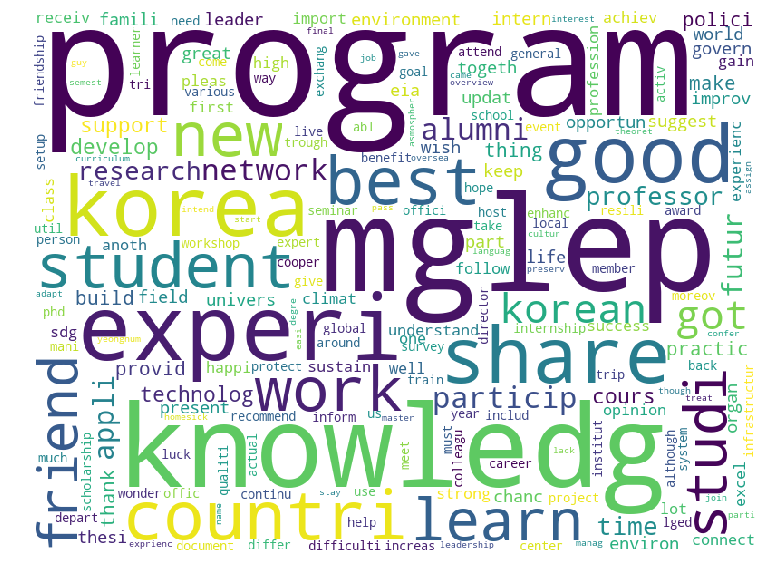

In [42]:
displayWordCloud(' '.join(clean_mglep_survey_comments))

In [43]:
%time train_data_features_comments = pipeline.fit_transform(clean_mglep_survey_comments)
train_data_features_comments

Wall time: 4.99 ms


<28x172 sparse matrix of type '<class 'numpy.int64'>'
	with 557 stored elements in Compressed Sparse Row format>

In [44]:
vocab_comments = vectorizer.get_feature_names()
print(len(vocab_comments))
vocab_comments[:10]

172


['abl',
 'achiev',
 'actual',
 'although',
 'alumni',
 'anoth',
 'anoth countri',
 'appli',
 'attend',
 'back']

In [45]:
dist_comments = np.sum(train_data_features_comments, axis=0)

for tag, count in zip(vocab_comments, dist_comments):
    print(count, tag)

[[ 2  3  2  2  7  3  2  6  2  2  2 10  2  5  2  4  2  3  2  3  2  2  6 11
   6  6  3  2  2  2  2  2  2  4  4  2  3  2 17  3  2  4  4  2  3  3  7  2
   6  3  2  2  2 13  2  7  2  4  4  3  2  3  2  2  3  4  2  2  2  4  2  4
  18  2  2 14  2  2  7  2  4  8  2  2  4  5  2  3  2  5  2  2  2 25  2  8
   3  2  2  2  7  9  2  2  3  2  2  3  2  4  4  4  7  2  2  2  3  5  5  4
   3  6 36  2  2  5  2  3  2  6  2  2  2 12  2  4  3  9  8  2  3  4  6  2
   3  2  6  5  4  5  6  2  4  2  2  2  3  4  4  2  2  2  2  2  3  4  2  9
   2  4  2  2]] abl


In [46]:
pd.DataFrame(dist_comments, columns=vocab_comments)

,abl,achiev,actual,although,alumni,anoth,anoth countri,appli,attend,back,...,various,way,well,wish,wonder,work,workshop,world,would,year
0,2,3,2,2,7,3,2,6,2,2,...,2,2,3,4,2,9,2,4,2,2


In [47]:
train_data_features_comments.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
vocab_sort_comments = pd.DataFrame(dist_comments, columns=vocab_comments).transpose()
vocab_sort_comments.rename(columns = {0:'사용빈도'}).sort_values(by='사용빈도', ascending=False).head(5)

,사용빈도
program,36
mglep,25
knowledg,18
experi,17
korea,14


## 초청자 발표요약 제출본 단어빈도수

In [49]:
summary = pd.read_excel('data/summary.xlsx', 
                    sheet_name='Sheet1', header=0)
summary.shape

(8, 2)

In [50]:
summary

,name,summary
0,Mohammad AL AMIN,Mutual relation between Korea and Bangladesh:\...
1,Firman MAULANA,When it comes to what you are going to be or y...
2,Esubalew Abebe KASSA,I am the second GESP/MGLEP student and I studi...
3,So Phea NEAK,Along distance after graduation from Universit...
4,Sa Aung Thu,The main objective of this presentation is to ...
5,Patcharaporn YAOWASOOTH,MGLEP gave me the opportunity to study in Park...
6,Thi Hong Hieu BUI,"I am Bui Thi Hong Hieu, come from Vietnam. I w..."
7,Ferdous AHMED,Journey Towards Sustainable Development: MGLEP...


In [51]:
clean_summary = review_to_words(summary['summary'][0])
clean_summary

'mutual relat korea bangladesh rangpur division hqs rangpur divis situat bank river teesta locat kilometr north west capit dhaka rangpur citi corpor popul area km work local govern divis ministri local govern rural develop cooper masterplan creat citi solid wast recommend master plan follow solid wast solid wast collect system avail older part citi hous hous collect communiti particip also avail citi sourc reveal averag ton solid wast collect per day dump open dump ground vehicl home collect carri van citizen dump household wast road side bin collect bin irregular bin found uncollect day togeth non core part citi household wast most use kitchen fuel feed domest pet recommend solid wast per project data acr land requir process solid wast reduc recycl reus concept wast establish household level discuss follow korea guy wast manag facil rangpur citi visit sever wast manag facil seoul stay univers seoul school arrang field visit part cours curriculum'

In [52]:
num_summary = summary['summary'].size
num_summary

8

In [53]:
clean_mglep_summary = []

for i in range(0, num_summary):
    clean_mglep_summary.append(review_to_words(summary['summary'][i]))

# 2개 단위로 상태를 찍도록 하여 어느 정도 실행이 되는 지 확인

# clean_mglep_survey_share_exp = []
# for i in range(0, num_share_exp):
#     if (i+1)%2 == 0:
#         print('Sharing Experience {} of {} '.format(i+1, num_share_exp))
#     clean_mglep_survey_share_exp.append(review_to_words(share_exp['Tell us your experience.'][i]))

%time summary['summary_clean'] = summary['summary'].apply(review_to_words)

Wall time: 68.8 ms


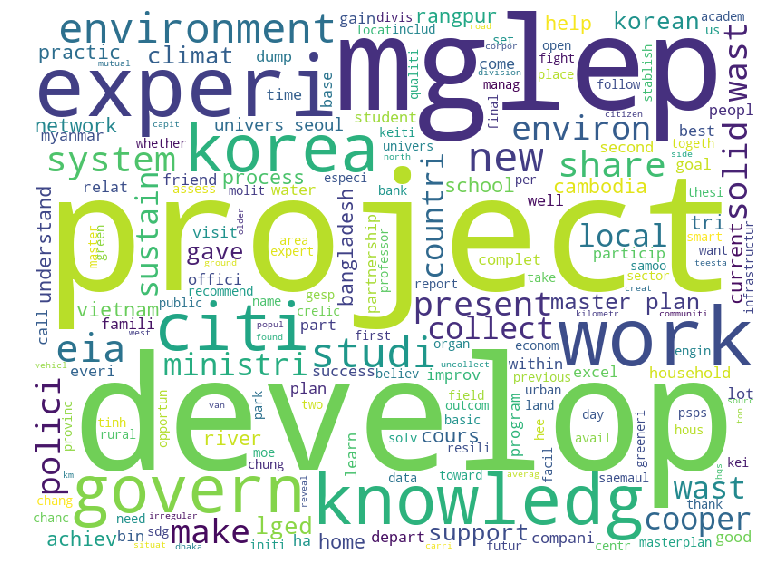

In [54]:
displayWordCloud(' '.join(clean_mglep_summary))

In [55]:
%time train_data_features_summary = pipeline.fit_transform(clean_mglep_summary)
train_data_features_summary

Wall time: 4.99 ms


<8x146 sparse matrix of type '<class 'numpy.int64'>'
	with 392 stored elements in Compressed Sparse Row format>

In [56]:
vocab_summary = vectorizer.get_feature_names()
print(len(vocab_summary))
vocab_summary[:10]

146


['academ',
 'achiev',
 'achiev sustain',
 'also',
 'area',
 'bangladesh',
 'bank',
 'basic',
 'believ',
 'best']

In [57]:
dist_summary = np.sum(train_data_features_summary, axis=0)

for tag, count in zip(vocab_summary, dist):
    print(count, tag)

[[ 3  4  3  3  2  3  3  3  2  5  3  3  2  3  7  2  3  2  2  4  4  6  3  2
   2  2  6  4  2  2  6  2  2  3  6  5  3  2  2  2  3  2 15  2  3  4  5  2
   6  2  2  5  4  3  3  3  2  5  3  3  3  3  3  2 27  3  3  3  2  3  2  2
   2  5  2  2  6  3  2  3  3  3  2  3  3  3  2  3 11  5  3  3  3  3  2  5
   2]] academ


In [58]:
pd.DataFrame(dist_summary, columns=vocab_summary)

,academ,achiev,achiev sustain,also,area,bangladesh,bank,basic,believ,best,...,urban,us,visit,want,water,well,within,work,would,would like
0,2,4,2,6,2,4,2,2,2,3,...,2,2,3,2,3,3,3,10,3,3


In [59]:
train_data_features_summary.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 2, 1, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 2, 0, 0]], dtype=int64)

In [60]:
pd.DataFrame(train_data_features_summary.toarray(), columns=vocab_summary)

,academ,achiev,achiev sustain,also,area,bangladesh,bank,basic,believ,best,...,urban,us,visit,want,water,well,within,work,would,would like
0,0,0,0,1,1,1,1,0,0,0,...,0,0,2,0,0,0,0,1,0,0
1,0,2,1,1,0,0,0,1,0,0,...,0,1,0,1,0,0,2,2,0,0
2,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2,1,1
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,2,0,0
5,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,1
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,1,0,0
7,0,1,1,0,0,3,1,0,1,1,...,1,0,1,0,1,0,0,2,0,0


In [61]:
vocab_sort_summary = pd.DataFrame(dist_summary, columns=vocab_summary).transpose()
vocab_sort_summary.rename(columns = {0:'사용빈도'}).sort_values(by='사용빈도', ascending=False).head(5)

,사용빈도
project,15
develop,14
mglep,14
experi,11
work,10


In [62]:
mglep_survey.columns.values

array(['선발여부(1차)', 'Name', 'University', 'Group', 'Country',
       'Name of Organization(Before MGLEP)', 'Department(Before MGLEP)',
       'Position(Before MGLEP)',
       'Name of Organization(After MGLEP completion)',
       'Department(After MGLEP completion)',
       'Position(After MGLEP completion)',
       'Explanation of your change(e.g. promotion, Department transfer, etc. )',
       'Q3. Have you been promoted?',
       'Q1. Number of your experience share activities',
       'Q2. Experience share type',
       'Q2-1. If you answered "others" above, please specify.',
       'Q3. Specify your experience share(please include date, event title if any.)',
       'Q1. Do you have any experience utilizing your thesis work/research?',
       'Q2. Please Specify your experiences.(please include date, event title if any.) ',
       'Tell us your experience.', 'Please leave any comments :D'], dtype=object)

In [63]:
mglep_survey2 = mglep_survey.copy()
mglep_survey2.columns = ['선발여부(1차)', '성명', '연수기관', '입학년도', '국가',
       '기관(연수전)', '부서(연수전)','직위(연수전)','기관(연수후)','부서(연수후)','직위(연수후)',
       '연수후어떤변동에대한설명(직위등)','승진여부','지식확산활동횟수','지식확산활동형태',
       '지식확산활동형태추가설명(기타선택자)',
       '지식확산활동에대한설명','연구활용경험여부','연구활용경험설명',
       'MGLEP네트워크활용한성과', '기타의견']

## 연수전후 변화 분석(기관변동, 부서변동, 직위)

### 응답자 수

In [64]:
uni_ans_ratio = pd.DataFrame(mglep_survey2['연수기관'].value_counts()).rename(columns = {'연수기관':'응답 수'})
uni_ans_ratio['응답률'] = ''
uni_ans_ratio['응답률'][0] = uni_ans_ratio['응답 수'][0] / 23
uni_ans_ratio['응답률'][1] = uni_ans_ratio['응답 수'][1] / 25
uni_ans_ratio

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,응답 수,응답률
University of Seoul,18,0.782609
Yeongnam University,16,0.64


In [65]:
group_ans_ratio = pd.DataFrame(mglep_survey2['입학년도'].value_counts()).rename(columns = {'입학년도':'응답 수'})
group_ans_ratio['응답률'] = ''
group_ans_ratio['응답률'][0] = group_ans_ratio['응답 수'][0] / 23
group_ans_ratio['응답률'][1] = group_ans_ratio['응답 수'][1] / 25
group_ans_ratio

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,응답 수,응답률
2016(MGLEP2),17,0.73913
2015(MGLEP1),17,0.68


### 연수전후 기관변동

In [66]:
mglep_survey2.loc[mglep_survey2['기관(연수전)'] != mglep_survey2['기관(연수후)'],'기관변동여부'] = '변동'

In [67]:
mglep_survey2['기관변동여부'] = mglep_survey2['기관변동여부'].fillna('동일')

In [68]:
organ_change_count = pd.DataFrame(mglep_survey2['기관변동여부'].value_counts())
organ_change_percent = pd.DataFrame(
    mglep_survey2['기관변동여부'].value_counts(normalize=True))
organ_change_df = organ_change_count.merge(
    organ_change_percent, left_index=True, right_index=True)
organ_change_df.columns = ['응답 수', '비율']
organ_change_df

,응답 수,비율
동일,20,0.588235
변동,14,0.411765


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [70]:
pd.DataFrame(mglep_survey2.groupby('연수기관')['기관변동여부'].value_counts()).unstack()

기관변동여부   
기관변동여부                  동일 변동
연수기관                         
University of Seoul     12  6
Yeongnam University      8  8

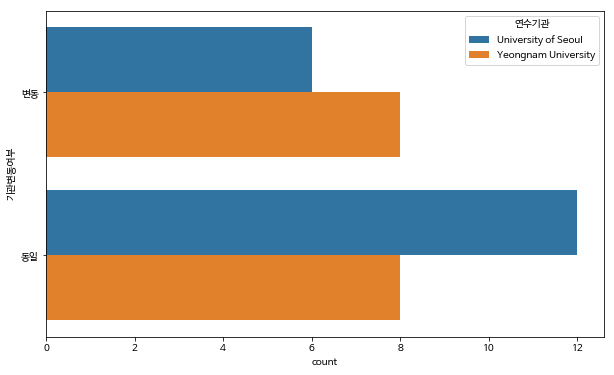

In [71]:
sns.countplot(y='기관변동여부', hue='연수기관',data=mglep_survey2)

### 연수전후 부서변동

In [72]:
mglep_survey2.loc[mglep_survey2['부서(연수전)'] != mglep_survey2['부서(연수후)'],'부서변동여부'] = '변동'

In [73]:
mglep_survey2['부서변동여부'] = mglep_survey2['부서변동여부'].fillna('동일')

In [74]:
dpt_change_count = pd.DataFrame(mglep_survey2['부서변동여부'].value_counts())
dpt_change_percent = pd.DataFrame(
    mglep_survey2['부서변동여부'].value_counts(normalize=True))
dpt_change_df = dpt_change_count.merge(
    dpt_change_percent, left_index=True, right_index=True)
dpt_change_df.columns = ['응답 수', '비율']
dpt_change_df

,응답 수,비율
변동,20,0.588235
동일,14,0.411765


In [75]:
pd.DataFrame(mglep_survey2.groupby('연수기관')['부서변동여부'].value_counts()).unstack()

부서변동여부    
부서변동여부                  동일  변동
연수기관                          
University of Seoul      6  12
Yeongnam University      8   8

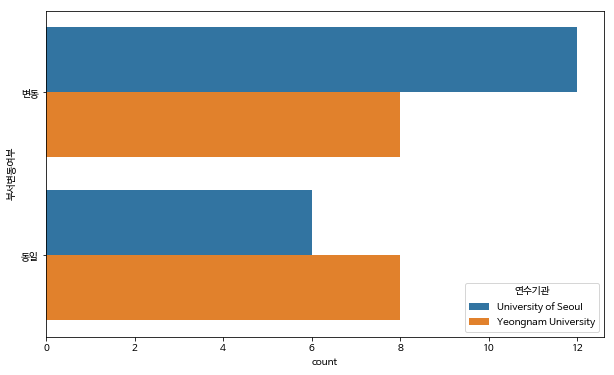

In [76]:
sns.countplot(y='부서변동여부', hue='연수기관',data=mglep_survey2)

### 연수전후 직위변동

In [77]:
mglep_survey2.loc[mglep_survey2['직위(연수전)'] != mglep_survey2['직위(연수후)'],'직위변동여부'] = '변동'

In [78]:
mglep_survey2['직위변동여부'] = mglep_survey2['직위변동여부'].fillna('동일')

In [79]:
position_change_count = pd.DataFrame(mglep_survey2['직위변동여부'].value_counts())
position_change_percent = pd.DataFrame(
    mglep_survey2['직위변동여부'].value_counts(normalize=True))
position_change_df = position_change_count.merge(
    position_change_percent, left_index=True, right_index=True)
position_change_df.columns = ['응답 수', '비율']
position_change_df

,응답 수,비율
동일,18,0.529412
변동,16,0.470588


In [80]:
pd.DataFrame(mglep_survey2.groupby('연수기관')['직위변동여부'].value_counts()).unstack()

직위변동여부    
직위변동여부                  동일  변동
연수기관                          
University of Seoul      7  11
Yeongnam University     11   5

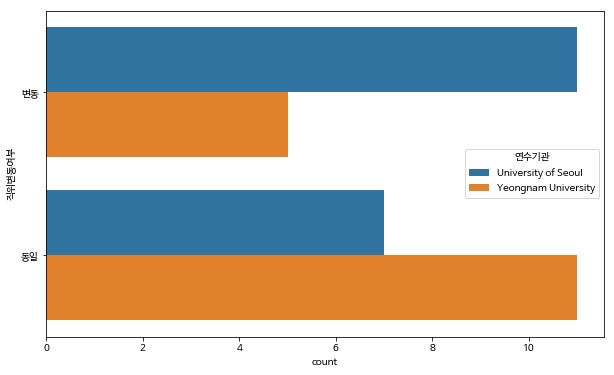

In [81]:
sns.countplot(y='직위변동여부', hue='연수기관',data=mglep_survey2)

### 서울시립대 직위변동자 11명의 승진여부 확인

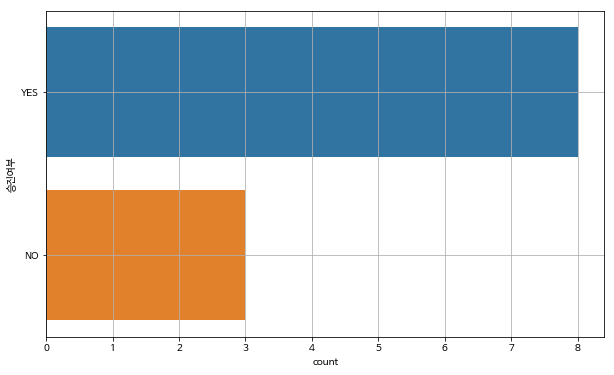

In [82]:
sns.countplot(y='승진여부',data=mglep_survey2[(mglep_survey2['직위변동여부'] == '변동') & (mglep_survey2['연수기관']=='University of Seoul')])
plt.grid()

In [83]:
promote_change_count = pd.DataFrame(mglep_survey2.groupby('연수기관')['승진여부'].value_counts())
promote_change_percent = pd.DataFrame(
    mglep_survey2.groupby('연수기관')['승진여부'].value_counts(normalize=True))
promote_change_df = promote_change_count.merge(
    promote_change_percent, left_index=True, right_index=True)
promote_change_df.columns = ['인원', '비율']
promote_change_df

인원        비율
연수기관                승진여부              
University of Seoul YES   11  0.611111
                    NO     7  0.388889
Yeongnam University NO     9  0.562500
                    YES    7  0.437500

### 승진여부 확인

In [84]:
promote_change_df.sort_values(by='승진여부', ascending=False)

,,인원,비율
연수기관,승진여부,,
University of Seoul,YES,11,0.611111
Yeongnam University,YES,7,0.437500
University of Seoul,NO,7,0.388889
Yeongnam University,NO,9,0.562500


###  지식확산활동

In [85]:
mglep_survey2.loc[mglep_survey2['지식확산활동횟수'] == 'more than 9', '지식확산활동횟수'] = '9이상'
mglep_survey2.loc[mglep_survey2['지식확산활동횟수'] == 'None', '지식확산활동횟수'] = '없음'

In [86]:
pd.DataFrame(mglep_survey2.groupby('입학년도')['지식확산활동횟수'].value_counts().sort_index()).rename(columns={'지식확산활동횟수':'참여자수합계'})

참여자수합계
입학년도         지식확산활동횟수        
2015(MGLEP1) 1~2           10
             3~4            2
             5~6            1
             7~8            1
             9이상            2
             없음             1
2016(MGLEP2) 1~2            6
             3~4            2
             5~6            2
             9이상            2
             없음             5

In [87]:
pd.DataFrame(mglep_survey2['지식확산활동횟수'].value_counts().sort_index()).T

,1~2,3~4,5~6,7~8,9이상,없음
지식확산활동횟수,16,4,3,1,4,6


In [88]:
pd.DataFrame(mglep_survey2['지식확산활동횟수'].value_counts().sort_index()).mean()

지식확산활동횟수    5.666667
dtype: float64

In [89]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

from matplotlib import style
print(style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


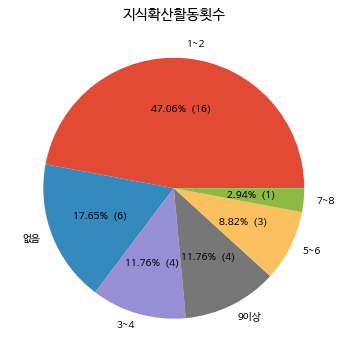

In [90]:
style.use('ggplot')

# plt.figure(figsize=(6,8))
# plt.pie(mglep_survey2['지식확산활동숫자'].value_counts(), 
#         labels=mglep_survey2['지식확산활동숫자'].value_counts().index, 
#         shadow=False, autopct='%1.1f%%', startangle=90)
# plt.title('지식확산활동횟수')
# plt.show()


plt.figure(figsize=plt.figaspect(1))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(mglep_survey2['지식확산활동횟수'].value_counts(), 
        labels=mglep_survey2['지식확산활동횟수'].value_counts().index, 
        autopct=make_autopct(mglep_survey2['지식확산활동횟수'].value_counts()))
plt.title('지식확산활동횟수')

plt.show()

# 참고: https://wikidocs.net/4768, https://blog.naver.com/samsjang/220767857442, https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

In [91]:
mglep_survey2.columns.values

array(['선발여부(1차)', '성명', '연수기관', '입학년도', '국가', '기관(연수전)', '부서(연수전)',
       '직위(연수전)', '기관(연수후)', '부서(연수후)', '직위(연수후)', '연수후어떤변동에대한설명(직위등)',
       '승진여부', '지식확산활동횟수', '지식확산활동형태', '지식확산활동형태추가설명(기타선택자)',
       '지식확산활동에대한설명', '연구활용경험여부', '연구활용경험설명', 'MGLEP네트워크활용한성과', '기타의견',
       '기관변동여부', '부서변동여부', '직위변동여부'], dtype=object)

In [92]:
know_share_count = pd.DataFrame(pd.DataFrame(mglep_survey2['지식확산활동형태'].value_counts().sort_values(ascending=False)))
know_share_percent = pd.DataFrame(
    pd.DataFrame(mglep_survey2['지식확산활동형태'].value_counts(normalize=True).sort_values(ascending=False)))
know_share_df = know_share_count.merge(know_share_percent, left_index=True, right_index=True)
know_share_df.columns = ['인원', '비율']
know_share_df.rename(index={"Experience shere": "Experience share"})
know_share_df

,인원,비율
Experience share / Knowledge share,13,0.382353
Presentation,8,0.235294
Seminar,5,0.147059
Other types of experience/knowledge exchange. Please specify below.,2,0.058824
Workshop,1,0.029412
During discussion in formal and informal meetings inside the ministy and also with relevant ministries/stakeholders when needed.,1,0.029412
My thesis,1,0.029412
"Seminar, Workshop, Presentation, Experience shere, Knowledge share",1,0.029412
Project,1,0.029412
any,1,0.029412


In [122]:
know_share_df.index = [['Experience share / Knowledge share', 'Presentation', 'Seminar',
       'Other types of experience/knowledge exchange. Please specify below.',
       'Seminar, Workshop, Presentation, Experience share, Knowledge share', 'Workshop',
       'During discussion in formal and informal meetings inside the ministy and also with relevant ministries/stakeholders when needed.',
       'My thesis',
       'Project', 'any']]
know_share_df.head(5)

,인원,비율
Experience share / Knowledge share,13,0.382353
Presentation,8,0.235294
Seminar,5,0.147059
Other types of experience/knowledge exchange. Please specify below.,2,0.058824
"Seminar, Workshop, Presentation, Experience share, Knowledge share",1,0.029412


In [117]:
know_share_df.index.values

array(['Experience share / Knowledge share', 'Presentation', 'Seminar',
       'Other types of experience/knowledge exchange. Please specify below.',
       'Workshop',
       'During discussion in formal and informal meetings inside the ministy and also with relevant ministries/stakeholders when needed.',
       'My thesis',
       'Seminar, Workshop, Presentation, Experience shere, Knowledge share',
       'Project', 'any'], dtype=object)

###  연구활용경험

In [93]:
mglep_survey2.groupby('입학년도')['연구활용경험여부'].value_counts().sort_index(level=1).unstack()

연구활용경험여부,No,Yes
입학년도,,
2015(MGLEP1),9,8
2016(MGLEP2),9,8


In [94]:
mglep_survey2.groupby('연수기관')['연구활용경험여부'].value_counts().sort_index(level=1).unstack()

연구활용경험여부,No,Yes
연수기관,,
University of Seoul,7,11
Yeongnam University,11,5


###  기타

##  국가별 지식확산활동횟수

In [95]:
know_share_num_country = mglep_survey2.groupby('국가')['지식확산활동횟수'].value_counts().sort_index().unstack().fillna('0').astype('int')

In [96]:
know_share_num_country_sum = pd.DataFrame(mglep_survey2.groupby('국가')['지식확산활동횟수'].value_counts().sort_index().unstack().fillna('0').astype('int').sum(axis=1))

In [97]:
know_share_num_country.merge(know_share_num_country_sum, left_index=True, right_index=True).rename(columns={0:'참여자수합계'})

,1~2,3~4,5~6,7~8,9이상,없음,참여자수합계
국가,,,,,,,
Algeria,1,0,1,0,0,1,3
Bangladesh,0,0,1,0,0,1,2
Cambodia,1,1,0,0,0,0,2
China,2,0,0,0,0,1,3
Colombia,1,1,0,0,0,0,2
Costa Rica,0,0,0,0,0,1,1
Ethiopia,1,0,0,0,0,0,1
Indonesia,0,0,0,0,3,1,4
Kazakhstan,1,0,0,0,0,0,1


### mglep 국별 학생 현황 (영남대 포함)

In [98]:
stu_info_mglep = pd.read_excel('Z:/200. 연락처/MGLEP학생현황(영남대포함).xlsx',
                         date_parser=['참가기간(시작)', '참가기간(종료)', '체류기간(시작)', '체류기간(종료)', '인턴십 기간(시작)', 
                                      '인턴십 기간(종료)', '인턴십 기간2(시작)', '인턴십 기간2(종료)', '인턴십 기간3(시작)', 
                                      '인턴십 기간3(종료)', '국외여행1-1', '국외여행1-2', '국외여행2-1', '국외여행2-2', '국외여행3-1', '국외여행3-2'])
# Z:/200. 연락처/IUDP학생현황.xlsx
stu_info_mglep.shape  

(48, 82)

In [99]:
mglep_survey['Country'] = mglep_survey['Country'].str.upper()

In [100]:
mglep_survey_joinrate_country = \
pd.merge(pd.DataFrame(mglep_survey['Country'].value_counts().reset_index()), 
         pd.DataFrame(stu_info_mglep['국가'].value_counts().reset_index()), 
         left_on = 'index', right_on = 'index', how='outer')

In [101]:
mglep_survey_joinrate_country = mglep_survey_joinrate_country[['index', '국가', 'Country']]
mglep_survey_joinrate_country.columns = [['국가', '연수생수', '설문참가자수']]
mglep_survey_joinrate_country

,국가,연수생수,설문참가자수
0,VIETNAM,7,6.0
1,INDONESIA,5,4.0
2,ALGERIA,3,3.0
3,CHINA,8,3.0
4,THAILAND,3,3.0
5,SRI LANKA,2,2.0
6,MYANMAR,2,2.0
7,BANGLADESH,3,2.0
8,COLOMBIA,2,2.0
9,CAMBODIA,3,2.0


In [102]:
mglep_survey_joinrate_country.fillna('0', inplace=True)

In [103]:
mglep_survey_joinrate_country.reset_index(drop=True)

,국가,연수생수,설문참가자수
0,VIETNAM,7,6
1,INDONESIA,5,4
2,ALGERIA,3,3
3,CHINA,8,3
4,THAILAND,3,3
5,SRI LANKA,2,2
6,MYANMAR,2,2
7,BANGLADESH,3,2
8,COLOMBIA,2,2
9,CAMBODIA,3,2


In [104]:
mglep_survey_joinrate_country['연수생수'].astype('int')

,연수생수
0,7
1,5
2,3
3,8
4,3
5,2
6,2
7,3
8,2
9,3


In [105]:
# mglep_survey_joinrate_country['설문참가비율'] = 
mglep_survey_joinrate_country['설문참가자수'].div(mglep_survey_joinrate_country['연수생수'])

,설문참가자수,연수생수
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
